# SearchSort

Here's an idea: what if we sorted a list using search?  
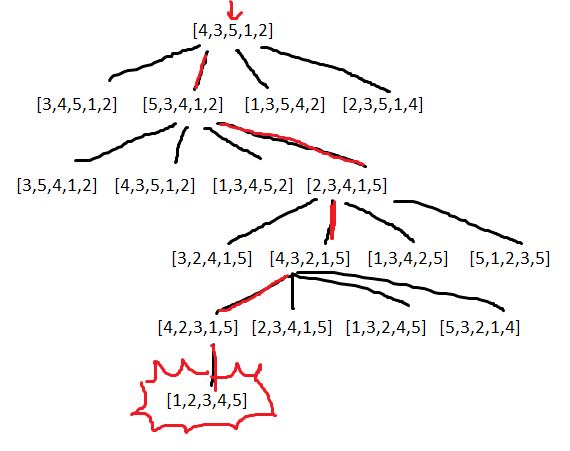  



In [5]:
from typing import TypeVar, List
from functools import reduce
T = TypeVar("T")

In [37]:
def cost(state : List[T]) -> int:
  # The cost function for A* search: Number of inversions
  count = 0
  N = len(state)
  for i in range(N):
    for j in range(i):
      if state[i] < state[j]:
        count += 1
  return count

cost([2,1,1])

2

In [29]:
def get_next_states(state : List[T]) -> List[List[T]]:
    states = []
    for i in range(1, len(state)):
        new_state = state.copy()
        new_state[0], new_state[i] = new_state[i], new_state[0]
        states.append(new_state)
    return states

In [91]:
from queue import PriorityQueue
from random import shuffle

def a_star_search(start_state : List[T]):
    pq = PriorityQueue()
    pq.put(start_state, cost(start_state))
    distances = {}
    backtrack_path = {}
    distances[str(start_state)] = 0
    def backtrack(item):
        curr_str  = str(item)
        start_str = str(start_state)
        output = "Solution!"
        while curr_str != start_str:
            output = curr_str + " -> " + output 
            curr_str = backtrack_path[curr_str]
        output = start_str + " -> " + output 
        print(output)

    while not pq.empty():
        item : tuple(int, List[T]) = pq.get()
        if cost(item) == 0:
            backtrack(item)
            return item
        for state in get_next_states(item):
            c = cost(state) 
            if str(state) not in distances or c < distances[str(state)]:
                pq.put(state, c)
                distances[str(state)] = c
                backtrack_path[str(state)] = str(item)

L = list(range(10))
shuffle(L)
print(L)
print(a_star_search(L))

[9, 7, 6, 0, 1, 5, 8, 3, 4, 2]


KeyboardInterrupt: 